This JNB analyzes 6 Standardized Hardship Indicators for 77 Chicago Community Areas.

The indicators are abbreviated as follows:

<ul>
    <li> UNEMP = % of community age 16 and older who are unemployed. </li>
     <li> NOHS = % of community age 25 and older without a high school diploma. </li>
         <li> DEP = % of community who are dependent (under age 18 or over age 64). </li>
             <li> HOUS= % of community with overcrowded housing (more than 1 occupant per room).</li>
                 <li> POV = % below federal poverty line
    <li> INC = per capita income.</li>
             
Source: https://greatcities.uic.edu/wp-content/uploads/2016/07/GCI-Hardship-Index-Fact-SheetV2.pdf (2010-2014) https://greatcities.uic.edu/wp-content/uploads/2019/12/Hardship-Index-Fact-Sheet-2017-ACS-Final-1.pdf (2013-2017).
 

Dataset:  standardizedindictors.xlsx  (standardized indicator values for the years 2010-2014 and 2013-2017)

1) import the usual libraries

In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt # plotting library

2) Import library for KMeans clustering

In [2]:
import sklearn
from sklearn.cluster import KMeans 

3) Read hardship index data.

In [3]:
hom_df = pd.read_excel('standardizedindicators.xlsx')
hom_df.head(2)

,Community,index,HI14,UNEMP14,NOHS14,DEP14,HOUS14,POV14,INC14,HI17,UNEMP17,NOHS17,DEP17,HOUS17,POV17,INC17,HOM14,HOM17,LAT,LON
0,Albany Park,13,47.0,-0.705481,0.667993,-0.470891,1.42992,-0.353466,-0.165118,45.7,-0.706842,0.506067,-0.530539,1.562581,-0.418499,-0.183089,2,1,41.96823,-87.72421
1,Archer Heights,56,54.4,-0.193683,1.136956,0.471085,1.51857,-0.672245,-0.605100,56.1,-0.442634,1.090575,0.742190,1.945762,-0.473646,-0.607925,0,3,41.81093,-87.72677


4) Create dataframe with the 2017 indicator values.

In [4]:
HI17=hom_df[["UNEMP17","NOHS17","DEP17","HOUS17","POV17","INC17"]]
HI17.head(2)

,UNEMP17,NOHS17,DEP17,HOUS17,POV17,INC17
0,-0.706842,0.506067,-0.530539,1.562581,-0.418499,-0.183089
1,-0.442634,1.090575,0.742190,1.945762,-0.473646,-0.607925


5) Create a dataframe with just the unemployment and income data.

In [5]:
EMPINC=HI17[["UNEMP17","INC17"]]
EMPINC.head(2)

,UNEMP17,INC17
0,-0.706842,-0.183089
1,-0.442634,-0.607925


5) Check that the 6 dimensional data points have been projected onto a 1 dimensional line.

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
projected = pca.fit_transform(EMPINC)
print(HI17.shape)
print(projected.shape)

(77, 6)
(77, 1)


6) Get the values on the projected line.

In [7]:
print(pca.components_) #unit vector specifying direction of the principal component line
projected[0]

[[-0.70710678  0.70710678]]


array([0.3703489])

In [8]:
print(pca.explained_variance_)

[1.66614794]


In [9]:
projected.var()

1.6445096544427147

7) Plot the points (UNEMP17,INC17) and the projection of these points onto the line y= -x.

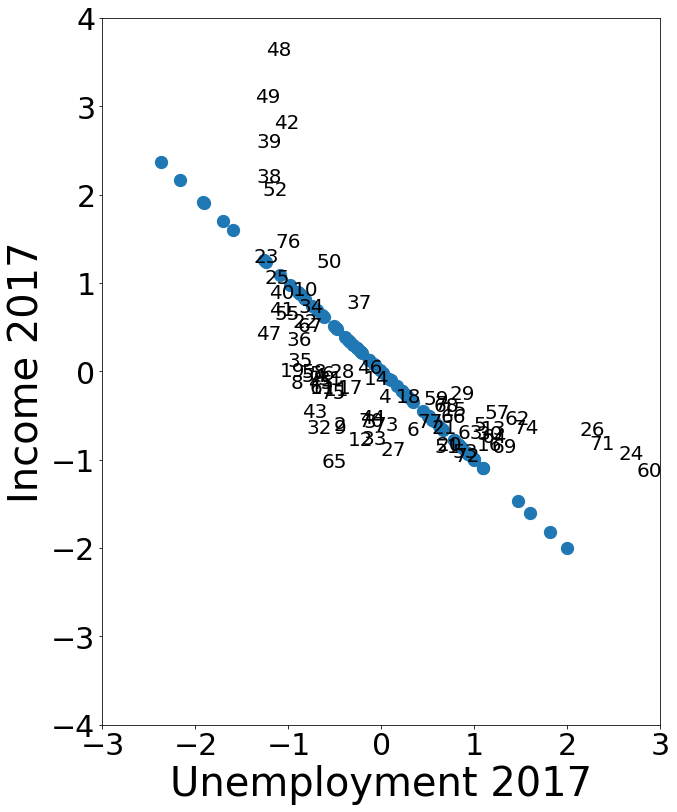

In [10]:
fig=plt.figure(figsize=(10,13))
plt.scatter(-projected[:, 0]/np.sqrt(2), projected[:, 0]/np.sqrt(2), s=150)
for i in EMPINC.index:
    plt.text(EMPINC.loc[i,"UNEMP17"],EMPINC.loc[i,"INC17"],str(i+1),size=20,va='center',ha='center')
plt.xlim(-3, 3) 
plt.ylim(-4, 4)
plt.xlabel('Unemployment 2017',size=40)
plt.ylabel('Income 2017',size=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.savefig("empinc.png")

In [11]:
import statistics as stat
print("Variance of Unemployment", stat.variance(EMPINC["UNEMP17"]))
print("Variance of Income", stat.variance(EMPINC["INC17"]))
print("Variance of Projection",stat.variance(projected[:, 0]))

Variance of Unemployment 1.0131578947368423
Variance of Income 1.013157894736842
Variance of Projection 1.6661479393695926


<h4>EXERCISE</h4>
Repeat the above analysis using "NOHS17" and "POV17".